In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
import datetime
warnings.filterwarnings('ignore')

df = pd.read_csv('https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/owid-covid-data.csv', parse_dates=["date"], low_memory=False)

In this assignment, you will continue work with the [Coronavirus Source Data](https://ourworldindata.org/coronavirus-source-data). You will plot different chart types. Don't forget to set titles and axis labels.

In [2]:
df.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN


**(1)** Plot a bar chart for total cases of the 20 countries that havebiggest numbers.

In [3]:
df.location.unique()

array(['Afghanistan', 'Africa', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Anguilla', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba',
       'Asia', 'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin',
       'Bermuda', 'Bhutan', 'Bolivia', 'Bonaire Sint Eustatius and Saba',
       'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'British Virgin Islands', 'Brunei', 'Bulgaria', 'Burkina Faso',
       'Burundi', 'Cambodia', 'Cameroon', 'Canada', 'Cape Verde',
       'Cayman Islands', 'Central African Republic', 'Chad', 'Chile',
       'China', 'Colombia', 'Comoros', 'Congo', 'Cook Islands',
       'Costa Rica', "Cote d'Ivoire", 'Croatia', 'Cuba', 'Curacao',
       'Cyprus', 'Czechia', 'Democratic Republic of Congo', 'Denmark',
       'Djibouti', 'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia',
       'Eswatini', 'Ethi

In [4]:
locations = ['World', 'Europe', 'North America', 'Asia', 'European Union', 'South America', 'South Africa','Africa','High income','Upper middle income','Lower middle income']

top_countries = df.loc[~df['location'].isin(locations) & (df['date']=='2021-12-18')].sort_values('total_cases', ascending=False)[:20]

In [5]:
top_countries.loc[:, ['location','total_cases']]

,location,total_cases
160527,United States,50830673.0
71516,India,34733194.0
22313,Brazil,22216112.0
159741,United Kingdom,11301092.0
126493,Russia,10009866.0
155624,Turkey,9154209.0
55416,France,8622194.0
59148,Germany,6813287.0
73790,Iran,6169011.0
143977,Spain,5455527.0


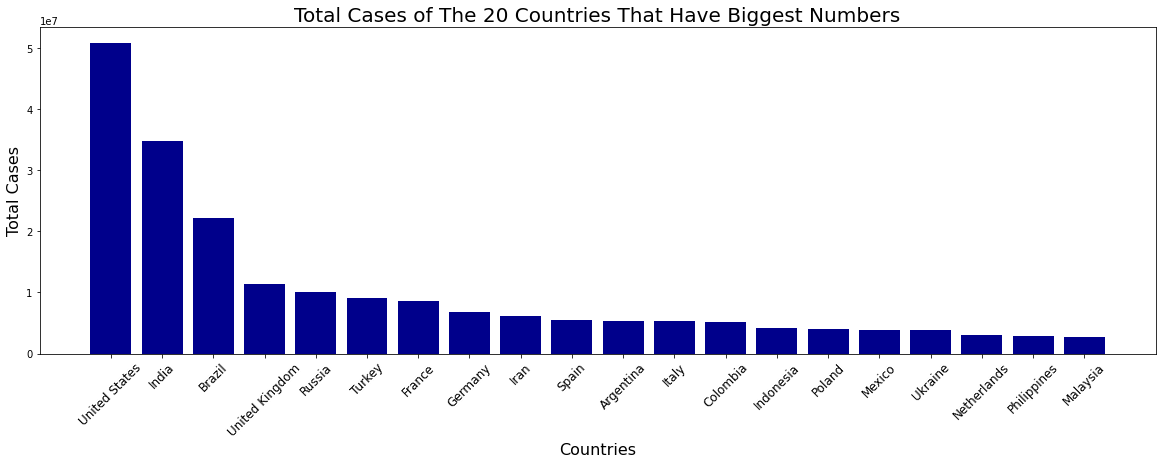

In [6]:
plt.figure(figsize=(20,6))
plt.title('Total Cases of The 20 Countries That Have Biggest Numbers',fontsize =20)
plt.xlabel('Countries', fontsize=16)
plt.ylabel('Total Cases', fontsize=16)
plt.bar(x=top_countries['location'], height=top_countries['total_cases'], color='darkblue')
plt.xticks(rotation=45, fontsize=12)
plt.show()

**(2)** Plot a histogram for daily deaths for any country you choose. Make three subplots for different bins.

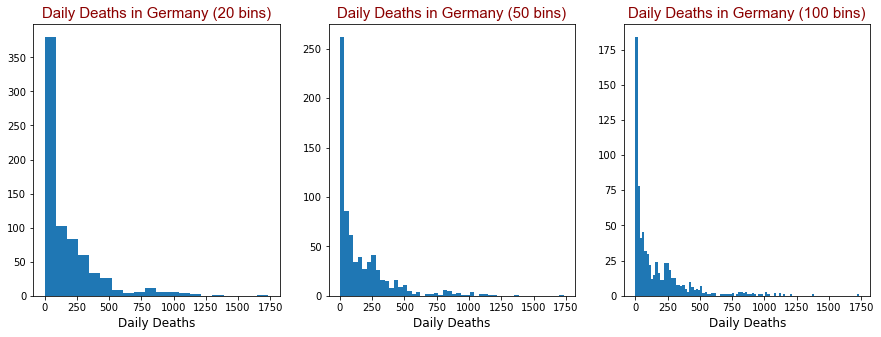

In [7]:
germany = df[df['location'] == 'Germany']

title_style_small = {'family': 'Arial', 'color': 'darkred', 'size': 10 }

plt.figure(figsize = (15,5))
bins = [20,50,100]
for i,bin_ in enumerate(bins):
    plt.subplot(1,3,i+1)
    plt.title(f'Daily Deaths in Germany ({bin_} bins)',fontdict = title_style_small, fontsize=15)
    plt.xlabel('Daily Deaths', fontsize=12)
    plt.hist(germany['new_deaths'], bins=bin_)


**(3)** Plot a scatter plot of new cases and new death for Germany and France.

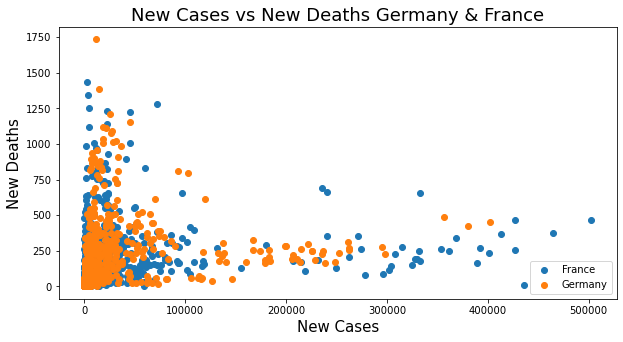

In [8]:
plt.figure(figsize=(10, 5))
plt.title('New Cases vs New Deaths Germany & France', fontsize=18)
for location in ['France', 'Germany']:
    plt.scatter(df[df.location == location].new_cases, 
                df[df.location == location].new_deaths, label=location)
plt.xlabel('New Cases', fontsize=15)
plt.ylabel('New Deaths', fontsize=15)
plt.legend(loc=4)
plt.show()


**(4)** Plot a boxplot for daily deaths for any country you choose.

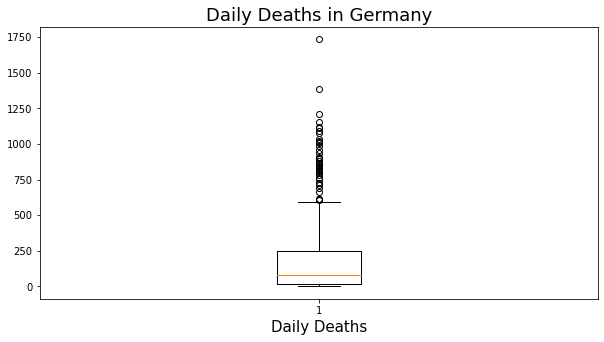

In [9]:
plt.figure(figsize=(10, 5))

plt.title('Daily Deaths in Germany', fontsize=18)
plt.xlabel('Daily Deaths', fontsize=15)
plt.boxplot(germany['new_deaths'].dropna())

plt.show()

**(5)** Calculate the total case for each continent and plot a pie chart 

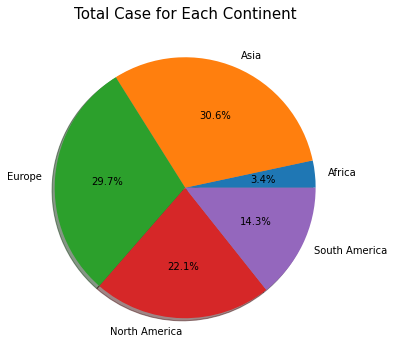

In [10]:
continents = ['Africa', 'Asia', 'Europe', 'North America', 'South America']
continents_df = df.loc[df['continent'].isin(locations) & (df['date'] == '2021-12-18')].groupby('continent')['total_cases'].sum()

plt.figure(figsize=(12, 6))
plt.title('Total Case for Each Continent', fontsize=15)
plt.pie(continents_df, labels=continents, autopct='%1.1f%%', shadow=True)
plt.show()


In [11]:
continents_df

continent
Africa            9199068.0
Asia             83846808.0
Europe           81341944.0
North America    60599314.0
South America    39262188.0
Name: total_cases, dtype: float64